<a href="https://colab.research.google.com/github/ManalSahafi/master-degree/blob/main/Neural%20networks/PCA_and_LDA_with_NN_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Loading the dataset

In [ ]:
# importing or loading the dataset
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data", delimiter = r"\s+",
                header=None )
df.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
X = pd.DataFrame(df)
X = X.drop([256,257,258,259,260,261,262,263,264,265], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_df = pd.DataFrame(df.iloc[:,[256,257,258,259,260,261,262,263,264,265]])
label_df.rename(columns={256:0, 257:1, 258:2, 259:3, 260:4, 261:5, 262:6, 263:7, 264:8, 265:9 }, inplace=True)

In [ ]:
label_df['y'] = label_df.apply(lambda x: label_df.columns[x.argmax()], axis = 1)

In [ ]:
y = label_df['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
1588    9
1589    9
1590    9
1591    9
1592    9
Name: y, Length: 1593, dtype: int64

In [ ]:
X.shape

(1593, 256)

In [ ]:
y.shape

(1593,)

PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA 
if the features were measured on different scales and we want to assign equal importance to all features.

# scale input variables using a scikit-learn

using a scikit-learn StandardScaler object. This will scale the variables so that they have a zero mean and a standard deviation of approximately 1.

In [ ]:
# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.32478039, -0.42632234, -0.54809503, ..., -0.39180601,
        -0.32122515, -0.2062505 ],
       [-0.32478039, -0.42632234, -0.54809503, ..., -0.39180601,
        -0.32122515, -0.2062505 ],
       [-0.32478039, -0.42632234, -0.54809503, ..., -0.39180601,
        -0.32122515, -0.2062505 ],
       ...,
       [-0.32478039, -0.42632234,  1.82450112, ..., -0.39180601,
        -0.32122515, -0.2062505 ],
       [-0.32478039,  2.34564294,  1.82450112, ..., -0.39180601,
        -0.32122515, -0.2062505 ],
       [-0.32478039, -0.42632234, -0.54809503, ..., -0.39180601,
        -0.32122515, -0.2062505 ]])

# split dataset 

In [ ]:
#Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

# Classification by Model wothout using PCA

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(multi_class='auto', solver='liblinear')
LR_model.fit(X_train, y_train)
LR_pred = LR_model.predict(X_test)
LR_score= LR_model.score(X_test, y_test)

print("The prediction on Test: '\n'",LR_pred,
     '\n','\n', "The score of prediction without using PCA: '\n'", LR_score)

The prediction on Test: '
' [5 6 4 5 8 1 9 4 1 3 7 6 3 7 4 2 6 6 0 5 4 3 5 7 3 5 9 9 1 1 6 6 2 1 5 2 0
 4 9 6 4 3 2 8 9 8 8 9 9 0 7 0 9 8 9 7 0 4 2 2 2 0 7 3 5 7 0 1 9 1 3 9 3 3
 4 1 9 0 4 1 4 8 6 8 7 2 3 6 0 2 0 8 0 6 6 4 5 9 3 2 1 7 3 1 6 7 5 0 0 1 6
 4 9 5 1 6 7 4 3 8 6 2 9 5 4 6 8 2 6 1 6 3 3 2 0 1 7 1 0 0 8 7 3 0 0 3 6 5
 6 9 0 0 1 5 0 6 9 0 5 6 8 6 3 9 3 9 6 3 9 3 5 0 1 7 3 8 6 4 2 1 3 5 6 5 4
 8 9 5 4 6 5 9 9 7 3 8 7 2 2 1 5 5 0 1 7 5 3 9 3 9 9 2 3 9 3 5 0 2 6 9 4 9
 5 5 0 6 2 5 6 7 6 5 1 2 6 1 0 6 1 4 9 7 6 0 1 3 7 5 6 6 5 4 4 3 3 1 8 6 6
 6 7 2 6 2 6 3 2 1 1 2 5 3 1 4 1 3 5 4 5 0 0 2 1 9 1 9 2 3 3 1 2 6 3 1 1 6
 8 9 5 9 9 0 2 9 3 4 3 5 1 8 9 7 4 4 6 9 1 0 4] 
 
 The score of prediction without using PCA: '
' 0.890282131661442


# Applying PCA  into 2 dimintion using scikit-learn

Projection Into Feature Subspace: With Scikit-Learn

In [ ]:
from sklearn.decomposition import PCA

  #step1: project from 256 to 2 dimensions
    
pca_2 = PCA(n_components=2)
projected = pca_2.fit_transform(X_scaled)
projected

   #step2:split dataset according to new input space

X_train_pca, X_test_pca, y_train, y_test = train_test_split(projected, y, test_size=0.2, random_state=30)

print("Shape of Train set before PCA:", X_scaled.shape)
print("Shape of Train set after PCA:",projected.shape)

Shape of Train set before PCA: (1593, 256)
Shape of Train set after PCA: (1593, 2)


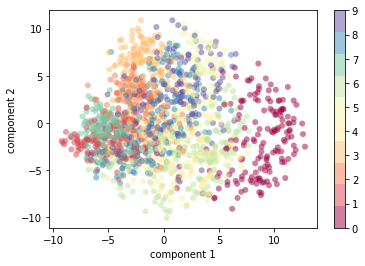

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


# Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. 

This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

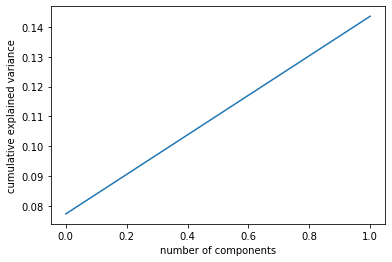

In [ ]:
# cumulative explained variance ratio for 2 components of PCA

plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Classification by Model with using PCA 

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_PCA_model = LogisticRegression(multi_class='auto', solver='liblinear')
LR_PCA_model.fit(X_train_pca, y_train)
LR_PCA_pred = LR_PCA_model.predict(X_test_pca)
LR_PCA_score= LR_PCA_model.score(X_test_pca, y_test)

print("The prediction on Test: '\n'",LR_PCA_pred,
     '\n','\n', "The score of prediction using 2 Componts of PCA: '\n'", LR_PCA_score)

The prediction on Test: '
' [5 6 4 4 3 1 2 0 7 3 1 0 3 7 4 2 4 0 0 4 5 3 5 7 7 4 5 8 1 4 1 6 2 1 5 3 0
 4 5 0 0 3 8 1 3 5 2 5 6 0 1 0 1 1 3 1 0 8 7 2 3 0 7 3 8 7 0 1 3 1 3 5 3 3
 4 4 5 0 4 7 4 8 4 4 7 3 3 0 0 5 0 4 0 1 6 6 4 3 5 3 1 7 3 1 0 7 8 0 0 1 4
 4 9 5 7 0 7 1 3 4 5 8 1 5 4 4 8 2 5 1 0 3 3 2 0 1 7 1 0 0 8 7 3 0 5 3 4 0
 0 8 0 5 7 3 0 6 5 0 4 4 5 7 5 2 2 0 6 3 3 3 3 0 1 7 3 5 4 6 4 7 3 4 4 5 1
 5 4 4 4 4 5 2 5 1 3 8 4 7 5 4 5 5 0 1 7 8 3 5 3 5 3 2 3 3 3 0 0 2 4 9 8 4
 5 4 0 4 7 5 5 1 0 8 4 3 8 7 0 4 1 5 5 7 0 0 7 5 2 5 4 0 4 8 5 3 2 7 8 4 4
 5 7 2 4 3 4 3 2 7 3 3 4 3 4 4 7 3 5 0 4 0 0 3 1 0 7 4 4 3 3 2 2 5 3 7 1 0
 1 5 5 3 4 4 1 2 3 4 3 6 7 3 4 7 4 4 4 2 1 0 6] 
 
 The score of prediction using 2 Componts of PCA: '
' 0.44200626959247646


In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v','d', 'h','p','.','*')
    colors = ('red', 'blue', 'gray', 'goldenrod','darkslategray', 'brown', 'dodgerblue', 'greenyellow', 'deeppink', 'darkorange')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    s=20,
                    alpha=0.6, 
                    c=[cmap(idx)],
                    marker=markers[idx],
                    label=cl)# plot decision regions for training set

# Plots PCA with LogisticRegression Classifer

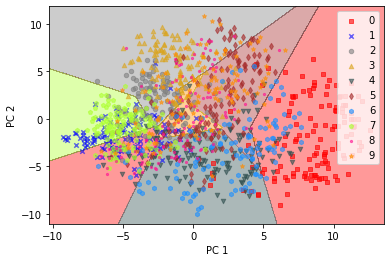

In [ ]:
# plot decision regions for test set
plot_decision_regions(X_train_pca, y_train,classifier=LR_PCA_model)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc=0)
plt.show()

# Use components such that 95% of variance is retained

In [ ]:
#step1: project data 
pca_95 = PCA(0.95)

projected_95 = pca_95.fit_transform(X_scaled)
print ("Principal Components:")
print (pca.n_components_)

#step2:split dataset according to new input space
X_train_95, X_test_95, y_train, y_test = train_test_split(projected_95, y, test_size=0.2, random_state=30)

print("Shape of Train set before PCA:", X_scaled.shape)
print("Shape of Train set after PCA:",projected_95.shape)

Principal Components:
162
Shape of Train set before PCA: (1593, 256)
Shape of Train set after PCA: (1593, 162)


In [ ]:
from sklearn.linear_model import LogisticRegression

LR_95_model = LogisticRegression(multi_class='auto', solver='liblinear')
LR_95_model.fit(X_train_95, y_train)
LR_95_pred = LR_95_model.predict(X_test_95)
LR_95_score= LR_95_model.score(X_test_95, y_test)

print("The prediction on Test: '\n'",LR_95_pred,
     '\n','\n', "The score of prediction using 162 Componts of PCA: '\n'", LR_95_score)

The prediction on Test: '
' [5 6 4 5 9 1 9 4 1 3 7 6 3 7 4 6 6 6 0 5 4 2 5 7 1 5 9 9 1 1 6 6 2 1 5 2 0
 4 9 6 4 3 2 8 9 8 8 9 9 0 7 0 8 8 9 7 0 4 2 2 2 0 7 5 5 7 0 1 9 1 3 9 3 3
 4 1 9 0 4 1 4 8 6 8 7 2 3 6 0 2 0 8 0 6 6 4 5 9 3 2 1 7 3 1 6 7 5 0 0 1 6
 4 9 5 1 6 7 4 3 8 6 2 1 5 4 6 8 2 6 1 6 3 3 2 0 1 7 1 0 0 8 7 3 0 0 3 6 5
 6 9 0 0 1 9 0 6 9 0 5 6 8 8 5 9 3 0 6 3 9 3 5 0 1 7 3 8 6 4 2 1 3 5 6 5 4
 8 9 5 4 6 5 9 9 7 3 2 4 2 2 5 5 5 0 1 7 3 3 9 3 9 9 2 3 9 3 5 0 2 6 9 4 9
 5 5 0 6 2 5 6 7 6 5 1 2 6 1 0 6 1 5 9 7 6 0 1 3 7 5 8 6 5 4 6 3 3 1 8 6 6
 6 7 2 6 2 8 3 2 1 1 2 5 3 1 4 1 3 5 4 5 0 0 2 1 9 1 9 8 3 3 1 2 6 3 1 1 6
 8 9 5 9 9 0 2 9 3 4 3 5 1 8 9 7 4 4 6 9 1 0 4] 
 
 The score of prediction using 162 Componts of PCA: '
' 0.8871473354231975


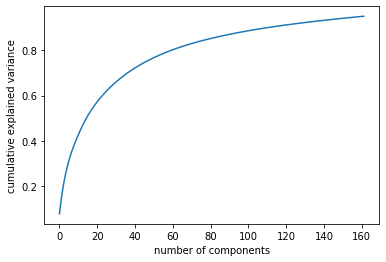

In [ ]:
# cumulative explained variance ratio for 162 components of PCA

plt.plot(np.cumsum(pca_95.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# # Classification by LDA with no need Model

In [ ]:
#
#Split dataset into training and testing sets
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_lda, y_train)
lda_pred= lda.predict(X_test_lda)
lda_score= lda.score(X_test_lda, y_test)

print("The prediction on Test: '\n'",lda_pred,
     '\n','\n', "The score of prediction using LDA: '\n'", lda_score)

The prediction on Test: '
' [9 6 4 5 8 7 9 9 1 3 1 6 3 7 4 8 6 6 0 5 4 3 6 7 7 5 9 9 1 1 6 6 2 1 5 2 0
 4 9 6 4 3 2 7 9 8 8 9 9 0 7 0 9 8 9 7 0 4 2 2 2 0 7 3 5 7 0 1 9 1 3 9 3 3
 4 1 9 0 4 7 4 8 6 8 7 2 3 6 0 2 0 8 0 6 6 4 5 9 3 2 1 7 3 1 6 7 5 0 0 7 6
 4 9 5 1 6 7 4 3 8 6 2 9 5 4 6 8 2 5 1 6 3 3 2 0 1 7 1 0 0 8 7 3 0 0 3 6 0
 6 9 0 0 1 3 0 6 9 0 5 6 8 8 3 9 3 9 6 3 9 3 5 0 1 7 3 8 6 4 2 7 3 5 6 5 4
 8 8 5 4 6 5 9 9 7 3 8 1 2 2 5 5 0 0 4 7 5 3 9 3 9 9 2 3 9 3 5 0 2 6 9 4 9
 5 5 0 6 2 5 6 7 6 5 1 2 6 7 0 6 1 4 9 7 6 0 1 3 7 5 6 6 9 4 5 3 8 1 8 6 6
 5 7 2 6 2 8 3 2 1 1 3 5 3 1 4 1 3 5 4 5 0 0 2 1 9 1 9 2 3 3 1 2 6 3 7 1 6
 8 9 5 9 9 0 2 9 3 4 3 6 1 8 2 7 4 4 6 9 1 0 4] 
 
 The score of prediction using LDA: '
' 0.8746081504702194
